In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the cleaned sales dataset and begin exploratory plots

In [2]:
# Load cleaned sales and basic setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

CLEANED_DIR = Path('d:/slooze_challenge/Slooze_Analysis/data/cleaned')
OUT_DIR = Path('d:/slooze_challenge/Slooze_Analysis/results')
OUT_DIR.mkdir(parents=True, exist_ok=True)

sales_path = CLEANED_DIR / 'sales_cleaned.csv'
if not sales_path.exists():
    raise FileNotFoundError(f"Could not find cleaned sales at {sales_path}. Please run '01_data_cleaning.ipynb' first.")

sales = pd.read_csv(sales_path, parse_dates=['date'], low_memory=False)
print('Loaded cleaned sales — rows:', len(sales))


Loaded cleaned sales — rows: 1048575


Saved SKU summary to results/sku_summary.csv
Saved monthly sales to results/monthly_sales.csv
Saved figure results/monthly_revenue.png


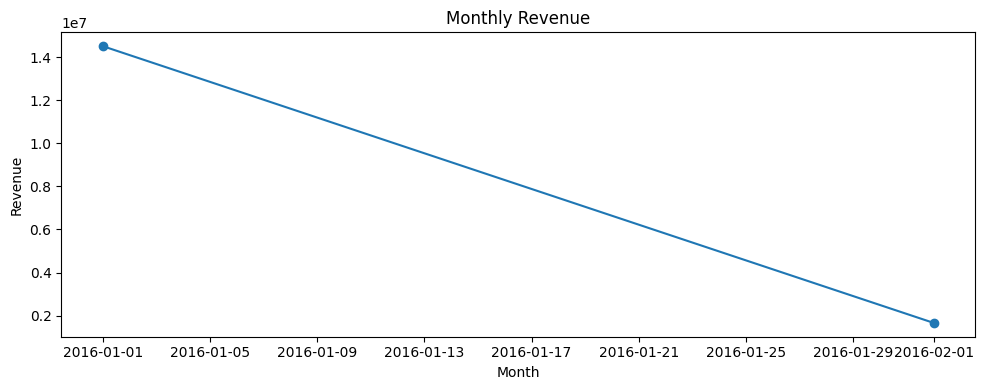

In [3]:
# Simple sales summaries you can share with the team
sales['month'] = sales['date'].dt.to_period('M')

# SKU-level summary
sku_summary = sales.groupby('sku').agg(
    total_quantity=('quantity','sum'),
    total_revenue=('revenue','sum')
).reset_index().sort_values('total_revenue', ascending=False)
sku_summary.to_csv(OUT_DIR / 'sku_summary.csv', index=False)
print('Saved SKU summary to results/sku_summary.csv')

# Monthly totals
monthly = sales.groupby(sales['date'].dt.to_period('M')).agg(
    month_quantity=('quantity','sum'),
    month_revenue=('revenue','sum')
).reset_index()
monthly['date'] = monthly['date'].dt.to_timestamp()
monthly.to_csv(OUT_DIR / 'monthly_sales.csv', index=False)
print('Saved monthly sales to results/monthly_sales.csv')

# Plot monthly revenue (saved to results)
plt.figure(figsize=(10,4))
plt.plot(monthly['date'], monthly['month_revenue'], marker='o')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.savefig(OUT_DIR / 'monthly_revenue.png')
print('Saved figure results/monthly_revenue.png')
